In [24]:
from collect_data import CustomDataset,create_dataloader
import os
from matplotlib import pyplot as plt
import numpy as np
import torch

from pstd.sd.encoder import VAE_Encoder
from pstd.sd.decoder import VAE_Decoder
from pstd.sd.pipeline import rescale

# Константы
DATASET_FOLDER = 'game_images_dataset'  # Папка для хранения данных
DATASET_SIZE = 1000  # Количество изображений в датасете
IMAGE_HEIGHT = 240  # Установите нужные размеры для изображений
IMAGE_WIDTH = 256
IMAGE_CHANNELS = 3
DATASET_FILENAME = 'game_dataset.npy'  # Имя файла для хранения всех изображений
BATCH_SIZE = 4  # Размер батча для DataLoader

In [25]:
dataloder = create_dataloader(os.path.join(DATASET_FOLDER, DATASET_FILENAME),batch_size=BATCH_SIZE,shuffle=True)

In [26]:
encoder = VAE_Encoder()
decoder = VAE_Decoder()

TypeError: Invalid shape (3, 256, 256) for image data

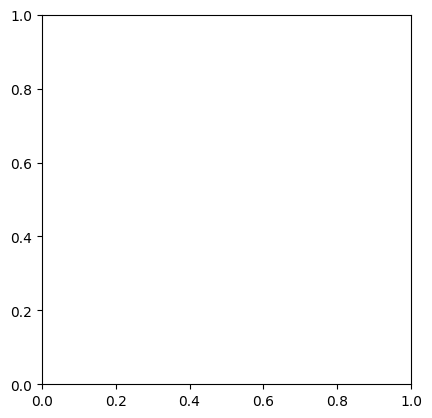

In [28]:
with torch.no_grad():
    encoder.eval()
    decoder.eval()
    for b in dataloder:
        
        batch_size,channels,height,width = b.shape

        noise = torch.rand(size=(batch_size,4,height//8,width//8))

        latents = encoder.forward(b,noise)

        images = decoder.forward(latents)

        plt.imshow(images[0])
        break

In [37]:
image = images[0].permute(1,2,0) #(H,W,C)

image = rescale(image,old_range=(-1,1),new_range=(0,255),clamp=True)

image = image.round().type(torch.uint8).numpy()

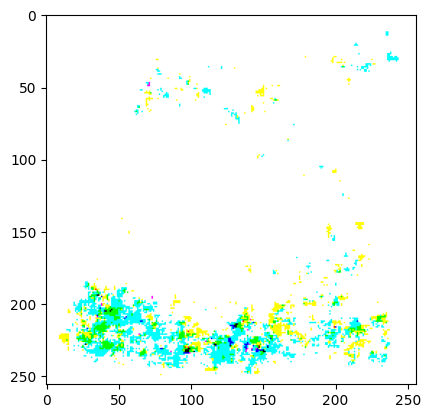

In [38]:
plt.imshow(image)